# Logistic Regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df1 = pd.read_csv('LogisticDataset.csv',sep=',')
df1.sample(4)

,x,z
0,1,0
2,3,0
6,7,1
3,4,1


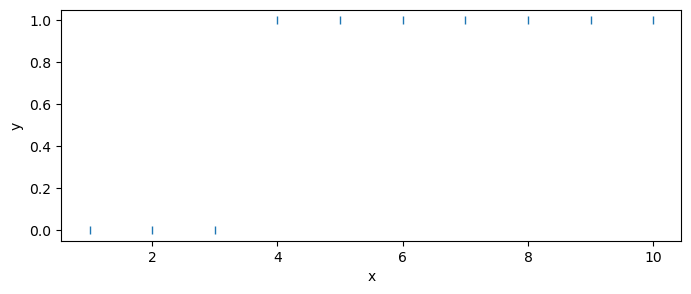

In [4]:
# plotting to see how our data look like

plt.figure(figsize=(8,3))
plt.plot(df1.x,df1.z,'|')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
x = np.array(df1[['x']])
y = np.array(df1['z'])
print(x.shape)
print(y.shape)

(10, 1)
(10,)


In [7]:
# here i am training model on whole dataset without split to keep things simple
from sklearn import linear_model

logr = linear_model.LogisticRegression()

logr.fit(x,y)


LogisticRegression()

The coefficients of the logistic function are also given, in the form
$$
prob_y(x) = \frac{1}{1+exp^{-(coef*x + intercept)}}
$$

There are two things we may want to predict
- given a x value, what is the probability that y value is 1?
- given a x value, what is the most ikely prediction for the categorical value y(0 or 1)

The first number between 0 and 1. When the predicted probability is less than 0.5, then the predicted value is 0, and when the predicted probability is more than 0.5, the preicted values is 1

We can obtain these predictions as follows?. The logr.predict_proba() returns **two predictions** for each value,
- the probability that it is a zero, and 
- the probability that it is one

Of course, both values add up to one, so there is some redudancy in that output.

In [9]:
# once our model is ready we can test it on new data

x_new = np.array([2, -1, .5])

x_new = x_new.reshape(-1,1) # to get valid shape and not just rows shape

print(x_new.shape)

(3, 1)


In [10]:
proba_predict = logr.predict_proba(x_new)
print(proba_predict)

[[0.84703204 0.15296796]
 [0.99447623 0.00552377]
 [0.96930063 0.03069937]]


In [12]:
proba_predict_1 = proba_predict[:,1] # we keep probability of success
print(proba_predict_1)

[0.15296796 0.00552377 0.03069937]


In [13]:
value_predict = logr.predict(x_new)
value_predict

array([0, 0, 0])

In [14]:
print(logr.coef_, logr.intercept_) # values to put into our equation

[[1.16054843]] [-4.03260691]


/home/akanchha/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


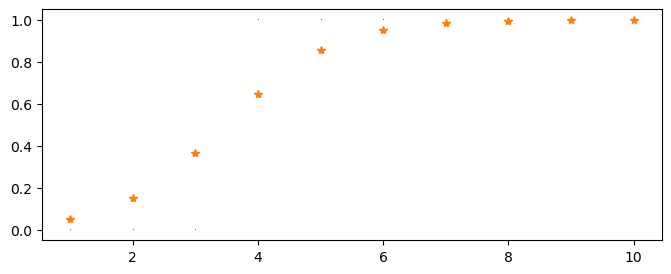

In [15]:
x = df1[['x']]
z = df1['z']
z_predict = logr.predict_proba(x)[:,1]

plt.figure(figsize=(8,3))
plt.plot(x,z,',')
plt.plot(x,z_predict,'*')
plt.show()


In [19]:
# what happens when we have more dimension
df2 = pd.read_csv('logitic2d.csv', sep=',')
df2.sample(4)



,x,y,label
0,1.5,3.1,0
3,3.0,6.8,1
5,4.0,8.9,1
6,4.5,9.5,1


In [20]:
# previously we trained model without split. here we will do it with train-test split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df2[['x','y']]
Y = df2['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [22]:
logr_2d = linear_model.LogisticRegression()
logr_2d.fit(X_train, Y_train)
print(logr_2d .coef_, logr_2d .intercept_)

[[0.39218682 0.68781199]] [-3.85227367]


In [23]:
df_train = pd.DataFrame(X_train)
df_train['label'] = Y_train

df_test = pd.DataFrame(X_test)
df_test['label'] = Y_test

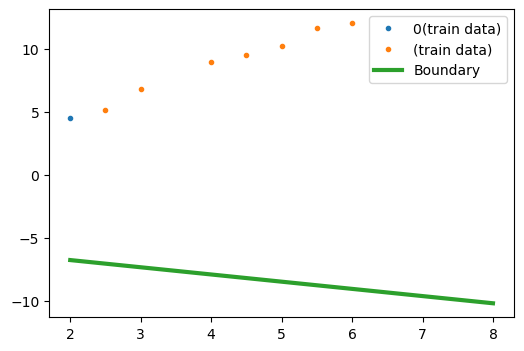

In [27]:
df_train_0 = df_train[df_train.label==0]
df_train_1 = df_train[df_train.label==1]

plt.figure(figsize = (6,4))
plt.plot(df_train_0.x,df_train_0.y,'.',label ='0(train data)')
plt.plot(df_train_1.x,df_train_1.y,'.',label = '(train data)')


# plot the equation that we found in below markdown cell
x_b = np.linspace(2,8,10)
y_b = -5.6-0.57*x_b
plt.plot(x_b,y_b,'-',linewidth=3, label='Boundary')
plt.legend()

plt.show()

The line of regression is 

$$L = -3.85227367 0.39218682x 0.68781199y$$
and the boundary decision is at L =0, so

$$ y = \frac{-3.85227367}{0.68781199} -\frac{0.39218682}{0.68781199} = -5.6-0.57x$$

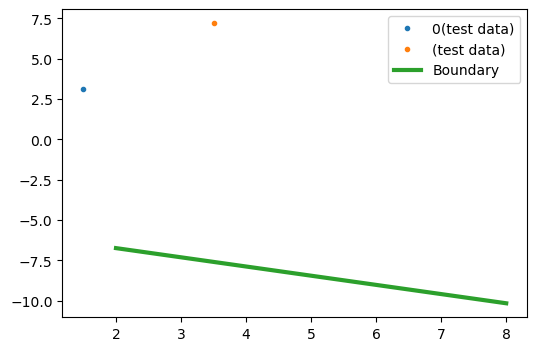

In [29]:

# so above we got model for our train data, now we will iterate same cde for test data, train keyword will be replaced with test
df_test_0 = df_test[df_test.label==0]
df_test_1 = df_test[df_test.label==1]

plt.figure(figsize = (6,4))
plt.plot(df_test_0.x,df_test_0.y,'.',label ='0(test data)')
plt.plot(df_test_1.x,df_test_1.y,'.',label = '(test data)')


# plot the equation that we found in below markdown cell
x_b = np.linspace(2,8,10)
y_b = -5.6-0.57*x_b # same equaion will be usd for test data
plt.plot(x_b,y_b,'-',linewidth=3, label='Boundary')
plt.legend()

plt.show()